In [196]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
df=pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [198]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [199]:
df.rename(columns={"Unnamed: 0":"index"},inplace=True)

In [200]:
df.drop(columns={"index","Address","Zip"},inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


<Axes: >

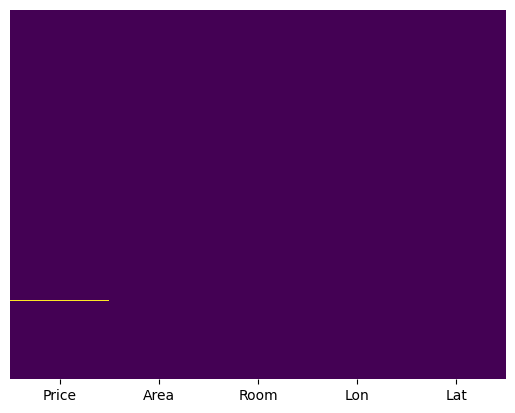

In [202]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EDA

<Axes: >

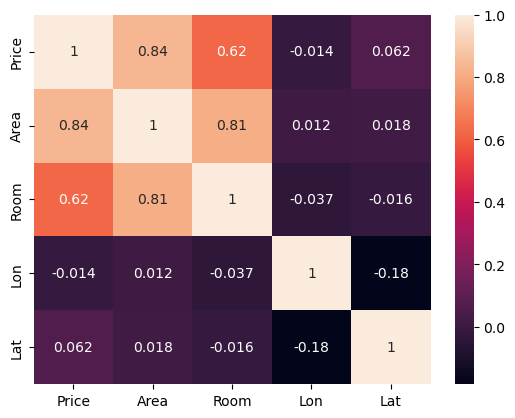

In [203]:
sns.heatmap(df.corr(),annot=True)

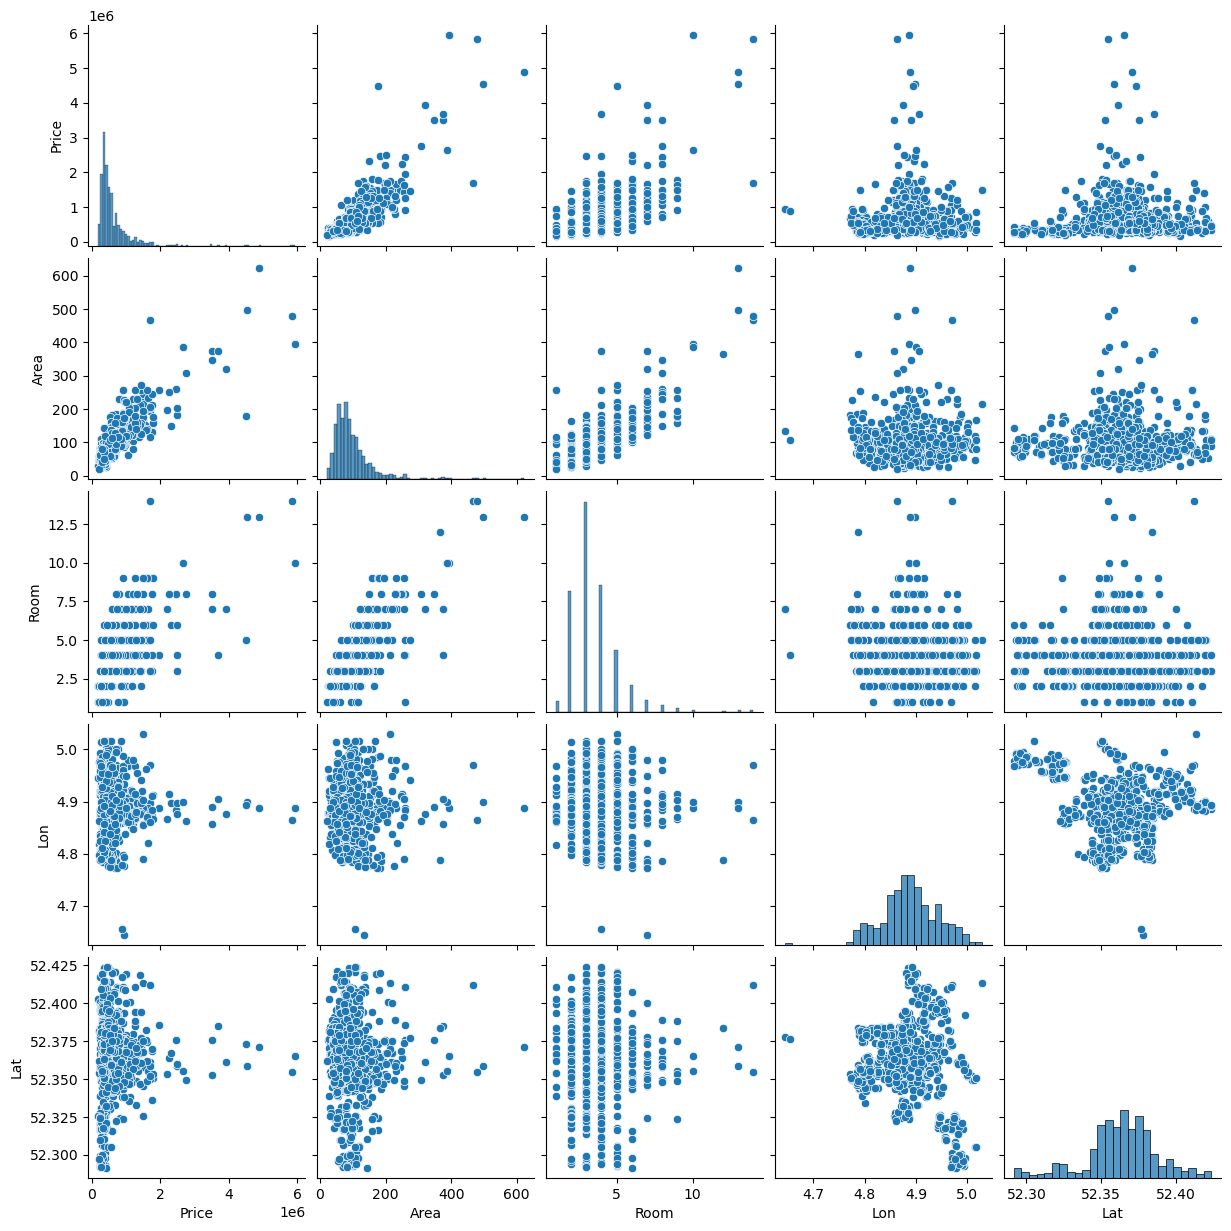

In [204]:
sns.pairplot(df)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   920 non-null    float64
 1   Area    924 non-null    int64  
 2   Room    924 non-null    int64  
 3   Lon     924 non-null    float64
 4   Lat     924 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 36.2 KB


<Axes: xlabel='Price', ylabel='Count'>

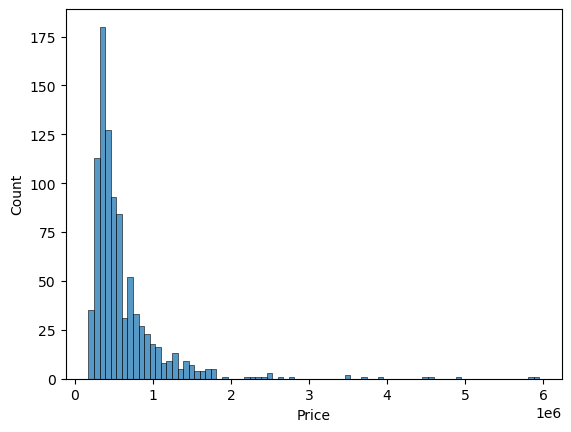

In [206]:
sns.histplot(df["Price"])

#### Here we can see the price column is not normalized as it has to much outliers now we normalize this column

In [207]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [208]:
q1 = df.describe()['Price']['25%']
q3 = df.describe()['Price']['75%']
iqr = q3 - q1
max_price = q3 + 1.5 * iqr
max_price

1225000.0

In [209]:
outlier = df[df['Price'] >= max_price]
outliers_count = outlier['Price'].count()
data_count = df['Price'].count()
print('Percentage removed: ' + str(round(outliers_count/data_count * 100, 2)) + '%')

Percentage removed: 7.72%


#### we had lost apoxmitly 8% data in price column but this won't effect the results 

In [210]:
df= df[df['Price'] <= max_price]

##### Here the price column has been normalized

<Axes: xlabel='Price', ylabel='Count'>

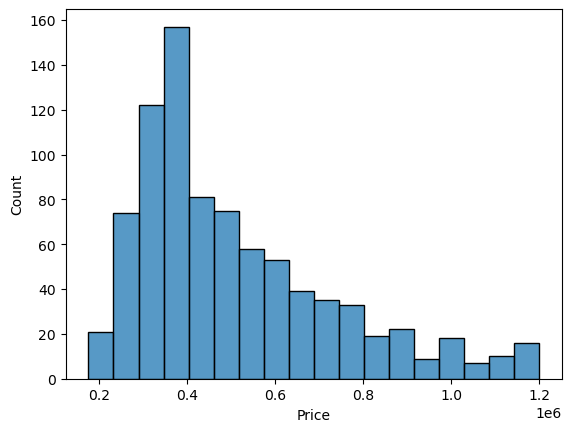

In [211]:
sns.histplot(df["Price"])

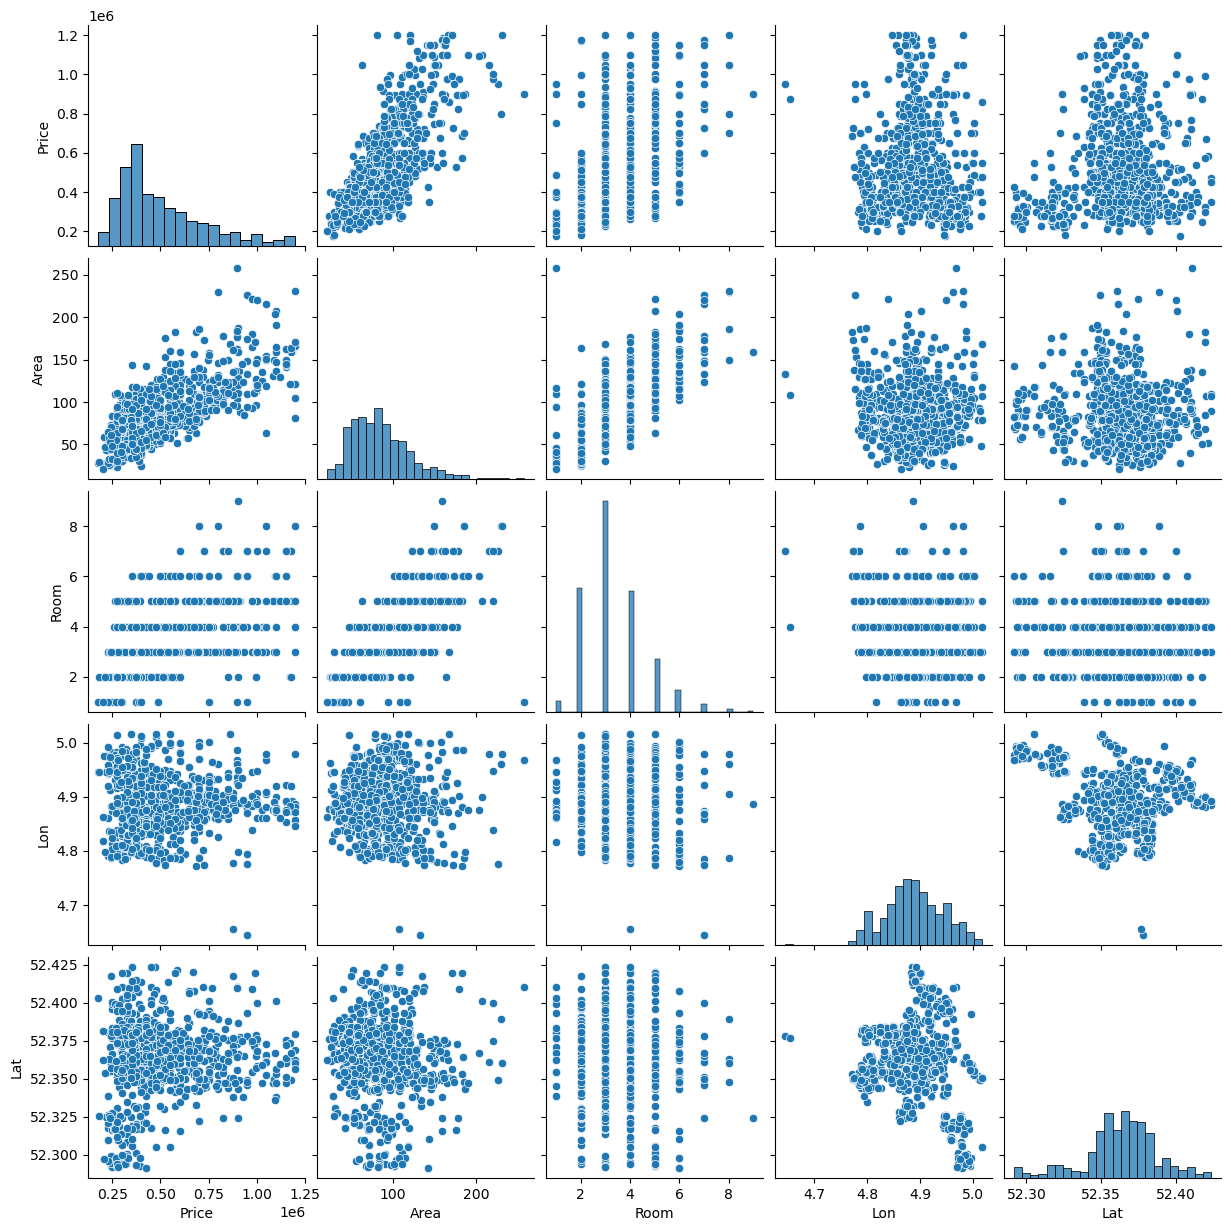

In [212]:
sns.pairplot(df)

### Spliting the Data

In [213]:
df.columns

Index(['Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [214]:
X=df[['Area', 'Room', 'Lon', 'Lat']]
Y=df["Price"]

## Train test Split

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [255]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [256]:
lm.fit(X_train,y_train)

LinearRegression()

### Evaluating the model

In [257]:
#printing the intercept
print (lm.intercept_)

-59530902.76599196


In [258]:
lm.coef_

array([   5373.53217318,  -27250.39286179,  -84024.08779434,
       1147476.99987199])

In [259]:
coef=pd.DataFrame(lm.coef_,X.columns,columns=["Coffitient"])
coef

,Coffitient
Area,5.373532e+03
Room,-2.725039e+04
Lon,-8.402409e+04
Lat,1.147477e+06


### Predicting model

In [260]:
prediction=lm.predict(X_test)

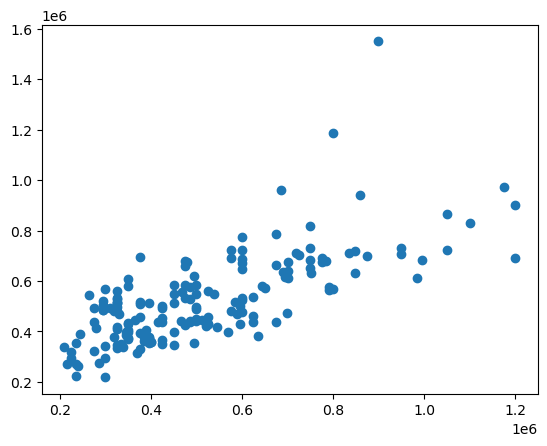

In [271]:
plt.scatter(y_test,prediction)

In [264]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 117932.49401902701
MSE: 23356697971.8003
RMSE: 152828.9827611252


<Axes: xlabel='Price', ylabel='Count'>

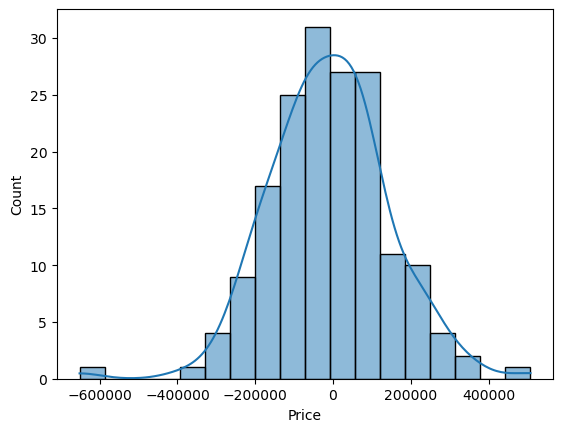

In [268]:
sns.histplot(y_test-prediction,kde=True)